## 문제53. (점심시간 문제) 책 175페이지의 Affine 클래스를 생성하고   
## 아래의 입력 데이터를 흘려보내서 순전파를 구현하시오!  

In [1]:
import numpy as np

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        return dx
    

x = np.array([[1,2],[3,4]])
W = np.array([[1,3,5], [2,4,6]])
b = np.array([1,1,1])

aff = Affine(W,b)

print(aff.forward(x))    

[[ 6 12 18]
 [12 26 40]]


## 문제54. 문제53번의 역전파를 구현하시오~

In [23]:
import numpy as np

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        return dx
    

x = np.array([[1,2],[3,4]])
W = np.array([[1,3,5], [2,4,6]])
b = np.array([1,1,1])

layer_1 = Affine(W,b)

out = layer_1.forward(x)
print(out)

dout = np.array([[1,2,3],[4,5,6]])
print(layer_1.backward(dout))

print("dW: \n", layer_1.dW)
print("db: \n", layer_1.db)

[[ 6 12 18]
 [12 26 40]]
[[22 28]
 [49 64]]
dW: 
 [[13 17 21]
 [18 24 30]]
db: 
 [5 7 9]


## ■ Softmax - with - Loss 계층 p176

### ※ 신경망 안에 들어가는 함수 클래스
                                 역전파 구현
1. Relu 함수 클래스 -------------------------> 도함수
2. Sigmoid 함수 클래스 ----------------------> 도함수
3. Affine 계층 클래스 -------------------------> 도함수

4. Softmax 함수 클래스 -----------------------> 도함수
5. 교차 엔트로피 함수 클래스 -----------------> 도함수

### ■ 소프트 맥스 함수의 식? (p.91)

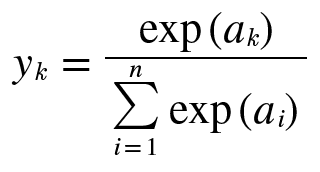

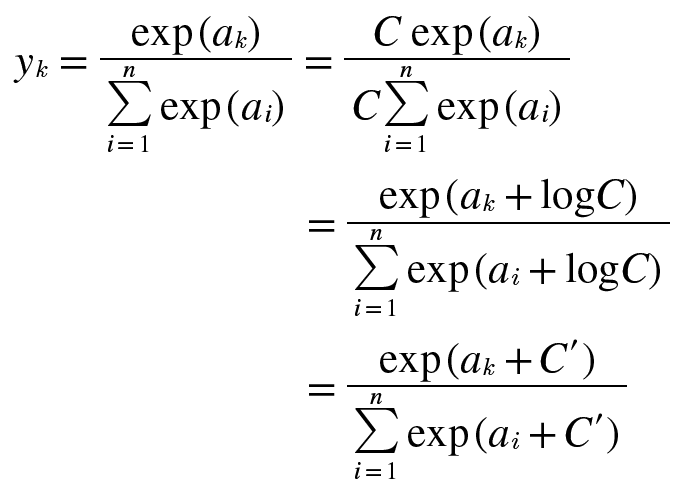

## 문제55. P179 페이지의 class softmaxwithloss를 생성하고 구현하시오.

In [ ]:
import numpy as np
from common.functions  import  *
from common.gradient  import  numerical_gradient

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
    
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

t = np.array([0,0,1,0,0,0,0,0,0,0])  # 숫자 2

x1 = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.04,0.3,0.1,0.5]) 
x2 = np.array([0.01,0.01,0.9,0.01,0.01,0.01,0.01,0.01,0.01,0.02])

soft = SoftmaxWithLoss()
print(soft.forward(x1, t))
print(soft.backward())

print(soft.forward(x2,t))
print(soft.backward()) 

"""
X1

2.4063467509023186
[ 0.00901439  0.00901439 -0.09098561  0.00901439  0.00901439  0.00901439
  0.00928892  0.01204708  0.00986332  0.01471434] 
  
  # 10개의 오차를 역전파
  
X2

1.5475681948007376
[ 0.0087373   0.0087373  -0.07872354  0.0087373   0.0087373   0.0087373
  0.0087373   0.0087373   0.0087373   0.00882511] 
  
  # 10개의 오차를 역전파
"""

## ■ 오차 역전파를 이용한 신경망 학습 전체 코드를 조립하기전에 알아야할 파이썬 문법

순전파 -------------------------------------------------------------->   
        Affine1, sigmoid, Affine2, sigmoid, Affine3, softmaxWithloss  
       <------------------------------------------------------------- 역전파
       
#### OrderDict() 딕셔너리를 이해해야 됨.

#### OrderDict는 그냥 Dictionary와는 다르게 입력된 데이터 뿐만 아니라 입력된 순서까지 같아야 동일한 것으로 판단합니다.

In [26]:
#예제: 
# 일반 딕셔너리 예제 (순서는 중요하지 않음.)

print (' dict : ')

d1 = {} # 비어있는 딕셔너리를 생성
d1['a'] = 'A'
d1['b'] = 'B'
d1['c'] = 'C'
d1['d'] = 'D'
d1['e'] = 'E'

d2 = {} # 비어있는 딕셔너리를 생성
d2['e'] = 'E'
d2['d'] = 'D'
d2['c'] = 'C'
d2['b'] = 'B' 
d2['a'] = 'A'

print (d1) # {'a': 'A', 'b': 'B', 'c': 'C', 'd': 'D', 'e': 'E'}
print (d2) # {'e': 'E', 'd': 'D', 'c': 'C', 'b': 'B', 'a': 'A'}

print ( d1 == d2 )  # True  

# OrderDict() 를 테스트 (순서도 같아야 같은것으로 취급함.)

import  collections
print ('OrderDict : ')
d1 = collections.OrderedDict() # 비어있는 OrderDict를 생성

d1['a'] = 'A'
d1['b'] = 'B'
d1['c'] = 'C'
d1['d'] = 'D'
d1['e'] = 'E'

d2 = collections.OrderedDict() # 비어있는 OrderDict를 생성

d2['e'] = 'E'
d2['d'] = 'D'
d2['c'] = 'C'
d2['b'] = 'B' 
d2['a'] = 'A'

print (d1)
print (d2) 

# OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E')])
# OrderedDict([('e', 'E'), ('d', 'D'), ('c', 'C'), ('b', 'B'), ('a', 'A')])

print (d1 == d2)  # False 

 dict : 
{'a': 'A', 'b': 'B', 'c': 'C', 'd': 'D', 'e': 'E'}
{'e': 'E', 'd': 'D', 'c': 'C', 'b': 'B', 'a': 'A'}
True
OrderDict : 
OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E')])
OrderedDict([('e', 'E'), ('d', 'D'), ('c', 'C'), ('b', 'B'), ('a', 'A')])
False


### ※설명: 순전파의 순서를 반대로(reverse)해서 역전파 될 수 있도록 orderDict 함수를 신경망 코드에 사용해야 한다.

## ■ 7. 오차 역전파법 구현하기

__" 책 P.180 신경망 학습의 전체 그림 "__

1단계 ----> 2단계 ----> 3단계 ----> 4단계

- 1단계 : 미니배치
- 2단계 : 기울기 산출
- 3단계 : 매개변수 갱신
- 4단계 : 반복

### 1. 수치미분을 이용한 2층 신경망 코드   
### 2. 오차역전법을 이용한 3층 신경망 코드   

In [ ]:
# 수치미분을 이용한 2층 신경망 코드


import sys , os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_train, t_train


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


class  TwoLayerNet:
    def  __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784,50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = 0.01 * np.random.randn(50,10) 
        self.params['b2'] = np.zeros(10) 

        
    def  predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y  = softmax(a2)
        
        return  y  
    

    def softmax(self,a):
        minus = a - np.max(a)
        return np.exp(minus) / np.sum(np.exp(minus))

    def cross_entropy_error(self, y,t):
        delta = 1e-7
        if y.ndim ==1:
            t=t.reshape(1,t.size)
            y=y.reshape(1,y.size)
        batch_size=y.shape[0]
        return -np.sum(t*np.log(y+delta)) / batch_size

    def loss(self,x,t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y,t)
        
    def  predict_result(self,x):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        return  y_hat 
        
    def  accuracy(self,x,t):
        y = self.predict(x)
        y_hat= np.argmax(y,axis=1)
        target = np.argmax(t, axis=1) 
        accuracy = np.sum(y_hat == target) / float(x.shape[0])
    
        return  accuracy 
    
    
    def  numerical_gradient(self, x, t):
 
        loss_W = lambda W : self.loss(x,t)
        grads = {} 

        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return  grads 

    

net = TwoLayerNet()
x, t = get_data()


for  i  in   range(10):
    x_batch = x[:1]
    t_batch = t[:1]
    grad = net.numerical_gradient( x_batch, t_batch )

    for  key  in  ('W1','W2','b1','b2'):
        net.params[key] -= 0.01 * grad[key] 

    acc = net.accuracy(x_batch, t_batch)
    print (acc) 

In [ ]:
# 오차역전파를 이용한 코드 + 그래프까지 그리기

# 1. 필요한 패키지를 로드합니다.

import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient # 수치미분 안할꺼라서 필요는 없지만 일단 넣고 봄.
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist


class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

        
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()